# CS5950J Course Project

This project recaps and systematises work that has been done in the exercise notebooks: if you have worked through the notebooks, little extra work is required.  The aim of the project is to give you the experience of trying to develop a neural network classifier, involving setting up a model, optimising the amount of regularisation, and investigating its performance. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **8 July 2022, 10am**

This project has **10%** of the marks of the course.

Please write your student number **here**:     
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset ***10 marks***

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms

input_size= 784
hidden_size= 100
num_classes= 10
num_epochs= 50
batch_size= 100
learning_rate= 0.001

transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] )
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)
mnist_testset = datasets.MNIST(root='./data', train=False, transform=transform_list)


# your code here (you can freely used and modify code from course lab-sheets throughout this project)

In [2]:
trainloader = torch.utils.data.DataLoader( mnist_trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=batch_size, shuffle=True)


## Set up model 

Set up a Pytorch model. Train on an intermediate-sized dataset (if you are using MNIST, say 10000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Model assessment:    ***30 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [3]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self). __init__()
        self.l1= nn.Linear(input_size, hidden_size)
        self.relu= nn.ReLU()
        self.l2= nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out= self.l1(x)
        out= self.relu(out)
        out= self.l2(out)
        return out
model= NeuralNet(input_size, hidden_size, num_classes)

criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr= learning_rate)

los= []
t_loss=[]
for epoch in range (num_epochs):
    avg= 0

    for i, (images, labels) in enumerate(trainloader):

        images= images.reshape(-1, 28*28)
        labels= labels
        outputs= model(images)
        loss = criterion(outputs, labels)

        avg = avg + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    los.append(avg/600)
    
    with torch.no_grad():
        n_loss=0
        for images, labels in testloader:
            images= images.reshape(-1, 28*28) 
            labels= labels 
            outputs= model(images)
            _,predictions= torch.max(outputs, 1)
            n_loss +=(predictions != labels).sum().item()
    
        t_loss.append(n_loss / 10000)
    
            

In [4]:
a=[torch.Tensor.detach(los[i]).numpy() for i in range(len(los))]

Text(0.5, 1.0, 'Train_loss')

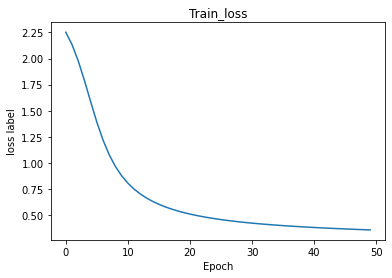

In [8]:
x= range(0,50)
plt.plot(x,a)
plt.xlabel("Epoch")
plt.ylabel("loss label")
plt.title("Train_loss")

x = epoch
y= loss
label = train_loss

Text(0.5, 1.0, 'Test_loss')

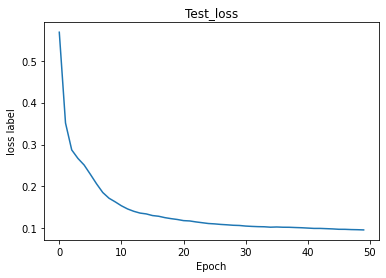

In [9]:
plt.plot(x,t_loss)
plt.xlabel("Epoch")
plt.ylabel("loss label")
plt.title("Test_loss")

### 2.  Regularisation experiment:  ***30 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [10]:
Reg= [0.001, 0.003,0.009, 0.05, 0.1]
t_loss= []
for i in Reg:
    
    model= NeuralNet(input_size, hidden_size, num_classes)
    criterion= nn.CrossEntropyLoss()
    optimizer= torch.optim.SGD(model.parameters(), lr= learning_rate, weight_decay= i)
    
    for epoch in range (num_epochs):
        for i, (images, labels) in enumerate(trainloader):
            images= images.reshape(-1, 28*28)#.to(device)
            labels= labels#.to(device)
            outputs= model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    with torch.no_grad():
        n_loss=0
        for images, labels in testloader:
            images= images.reshape(-1, 28*28) #.to(device)
            labels= labels #.to(device)
            outputs= model(images)
            _,predictions= torch.max(outputs, 1)
            n_loss +=(predictions != labels).sum().item()
        t_loss.append(n_loss / 10000)
        

Text(0.5, 1.0, 'Test loss')

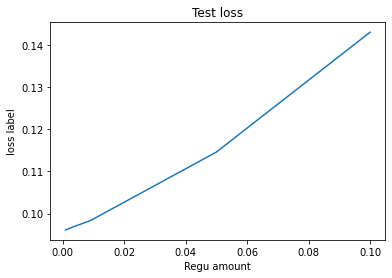

In [11]:
plt.plot(Reg, t_loss)
plt.xlabel("Regu amount")
plt.ylabel("loss label")
plt.title("Test loss")

x = regu_amount
y= loss
label = test_loss

### 3.  Learning curve experiment:  ***30 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [12]:
# your code here
train_amount= [1000, 2000, 4000, 8000, 16000, 32000]
t_loss= []
for i in train_amount:
    
    mnist_small=[mnist_trainset[i] for i in range(0,i) ]
    trainloader_small = torch.utils.data.DataLoader( mnist_small, batch_size=batch_size, shuffle=True)
    
    
    
    model= NeuralNet(input_size, hidden_size, num_classes)
    criterion= nn.CrossEntropyLoss()
    optimizer= torch.optim.SGD(model.parameters(), lr= learning_rate, weight_decay= 0.003)
    
    
    for epoch in range (num_epochs):
        for i, (images, labels) in enumerate(trainloader_small):
            images= images.reshape(-1, 28*28)
            labels= labels
            outputs= model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
    with torch.no_grad():
        n_loss=0
        for images, labels in testloader:
            images= images.reshape(-1, 28*28)
            labels= labels
            outputs= model(images)
            _,predictions= torch.max(outputs, 1)
            n_loss +=(predictions != labels).sum().item()
        t_loss.append(n_loss / 10000)
        

Text(0.5, 1.0, 'test_loss')

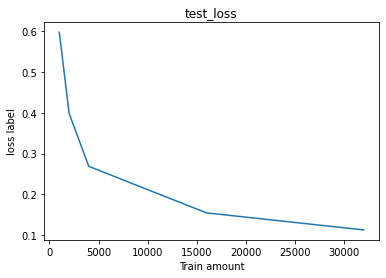

In [13]:
plt.plot(train_amount,t_loss)
plt.xlabel("Train amount")
plt.ylabel("loss label")
plt.title("test_loss")

x = train amount
y= loss
label = test_loss